# Red Wine Quality Prediction (Practice Project-3)

In [1]:
# Import some necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the dataset

wine_data = pd.read_csv("winequality-red.csv")
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Shape of the dataset

print("Shape of the Dataset -->",wine_data.shape)

Shape of the Dataset --> (1599, 12)


In [4]:
# Describing the dataset

print("\nDescription of the Dataset -->")
wine_data.describe()


Description of the Dataset -->


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


While Analysing the dataset, I found major issues in the features except pH , density & alcohol but maybe there is skewness.

'max' of fixed acidity is high becuase its 'min' is 4.60 , 25% is 7.10, 50% is 7.90, 75% is 9.20 and according to these it's 'max' should be between 10 to 11 but it has 15.90 means and maybe there is skewness.

'max' of volatile acidity is high becuase its 'min' is 0.12 , 25% is 0.39, 50% is 0.52, 75% is 0.62 and according to these it's 'max' should be between 0.75 to 0.80 but it has 1.58 means high and maybe there is skewness.


citric acid has min 0 values and which is not acceptable.

'max' of  fixed residual is very high becuase it's 'min' is .09 & 50% is 2.20 and according to these it's 'max' should be between 4.5 to 5.5 but it has 15.50 means too high and not acceptable.

'max' of chlorides is high becuase its 'min' is 0.12 , 25% is 0.70, 50% is 0.79, 75% is 0.90 and according to these it's 'max' should be between 0.10 to 0.105 but it has 0.611 means too high and not acceptable.

'max' of free sulfer dioxide feature is very high becuase it's 'min' is 1 & 50% is 14 according to these it's 'max' should be between 28 to 30 but it has 72 means too high and not acceptable.

'max' of total sulfer dioxide feature is very high becuase it's 'min' is 6 & 50% is 38 according to these it's 'max' should be between 75 to 80 but it has 289 means too high and not acceptable.

'max' of sulphates feature is  high becuase it's 'min' is 0.33 & 50% is 0.62 according to these it's 'max' should be between 0.85 to 80 but it has 2.0 means too high and not acceptable.


## Quick information about dataset

In [5]:
# Quick information about dataset

wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Now It is clear that there is no any feature has null values but while analysing the dataset I found the '0' value in 'citric acid' feature. So, let's check and fix.

#### Our Target Column is Quality.

## Dealing with '0' values

In [6]:
# Check the index where 'citric acid' feature has '0 values'

index = np.where(wine_data["citric acid"] == 0)
index

(array([   0,    1,    4,    5,    7,   12,   28,   29,   31,   35,   77,
          96,  122,  123,  126,  127,  142,  144,  158,  178,  235,  236,
         237,  238,  245,  249,  251,  254,  257,  266,  345,  349,  351,
         352,  419,  602,  612,  624,  625,  635,  690,  712,  719,  737,
         739,  742,  757,  758,  762,  775,  780,  793,  802,  818,  820,
         821,  841,  876,  881,  888,  907,  985,  996,  997,  999, 1013,
        1025, 1027, 1030, 1032, 1040, 1045, 1046, 1110, 1119, 1121, 1122,
        1124, 1127, 1130, 1154, 1171, 1175, 1177, 1178, 1191, 1193, 1228,
        1236, 1238, 1239, 1252, 1253, 1258, 1259, 1261, 1263, 1272, 1277,
        1282, 1290, 1293, 1295, 1296, 1298, 1299, 1300, 1316, 1321, 1334,
        1336, 1337, 1338, 1349, 1369, 1374, 1390, 1399, 1407, 1409, 1410,
        1415, 1422, 1428, 1432, 1438, 1447, 1455, 1461, 1550, 1551, 1553],
       dtype=int64),)

There are 12 Rows and 11 Columns, means 12*11 = 132   '0' values in this dataset. So, let's fix it

In [7]:
# Dealing with '0' values which are available in the 'citric acid' feature

wine_data["citric acid"] = wine_data["citric acid"].replace(0,wine_data["citric acid"].mean())

index = np.where(wine_data == 0)
index

(array([], dtype=int64), array([], dtype=int64))

Now it seems that there is no any feature has '0' value. So let's continue

## Checking Outliers

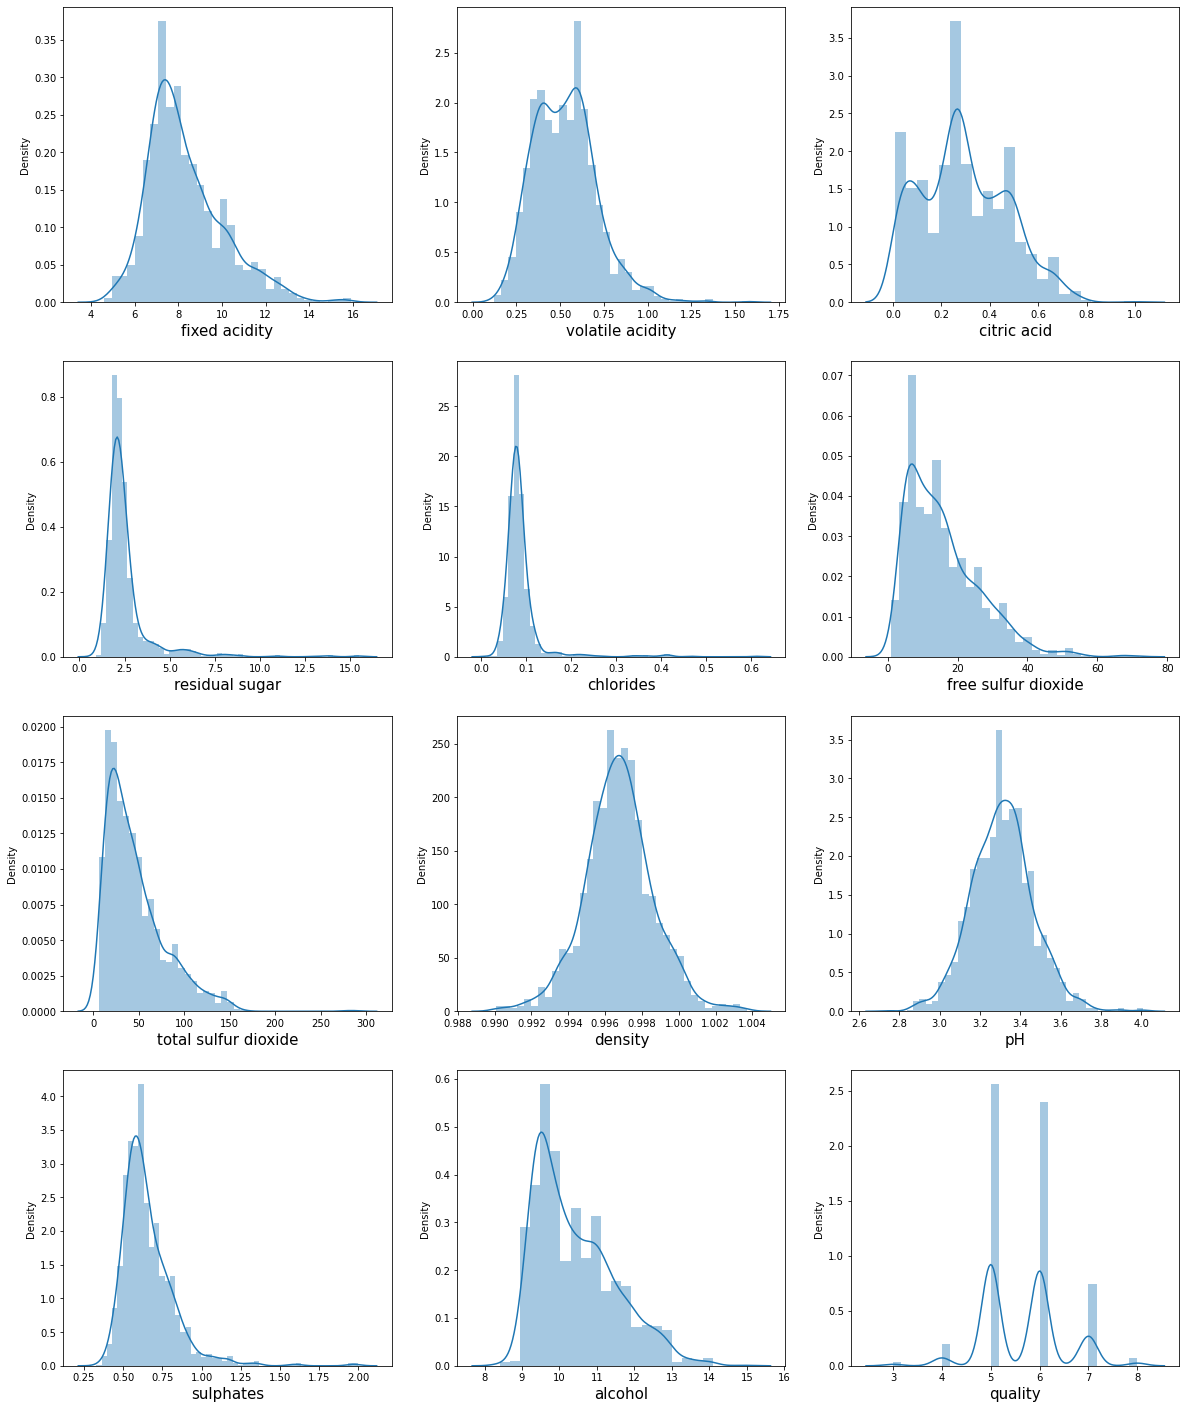

In [8]:
plt.figure(figsize = (20,25), facecolor = 'white')
graphplot = 1
for column in wine_data:
    if graphplot <= 12:
        ax = plt.subplot(4,3,graphplot)
        sns.distplot(wine_data[column])
        plt.xlabel(column, fontsize = 15)
    graphplot+=1
plt.show()

## Visualizing the skewness

In [9]:
# Checking the skewness of dataset

wine_data.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.338008
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

Let's consider the skewness range between -0.5 to +0.5.

Except features 'density','pH','quality' and 'citric acid'. Some features has minimum skewness and some has very high skewness. So, let's fix this skewness using outlier removal technique

## Removing Outliers

In [10]:
# Selecting Skewness features

features = ["fixed acidity","volatile acidity", "residual sugar",
            "chlorides", "free sulfur dioxide", "total sulfur dioxide",
            "sulphates", "alcohol"]

In [11]:
# Importing PowerTransformer technique

from sklearn.preprocessing import PowerTransformer

In [12]:
pow_tra = PowerTransformer(method= 'yeo-johnson')

wine_data[features] = pow_tra.fit_transform(wine_data[features].values)

## Skewness

In [13]:
# checking skewness again...

wine_data.skew()

fixed acidity           0.002529
volatile acidity        0.003099
citric acid             0.338008
residual sugar         -0.015715
chlorides              -0.151304
free sulfur dioxide    -0.009948
total sulfur dioxide   -0.003752
density                 0.071288
pH                      0.193683
sulphates               0.009985
alcohol                 0.112372
quality                 0.217802
dtype: float64

Now I can see that the range of skewness of all the features are between -0.5 to +0.5. It seems that all the outliers are adjusted. Let's continue

## Analyzing the target column

In [14]:
wine_data["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

There are 6 unique values in our target column

In [15]:
wine_data["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

## Univariate Analysis

<AxesSubplot:xlabel='quality', ylabel='count'>

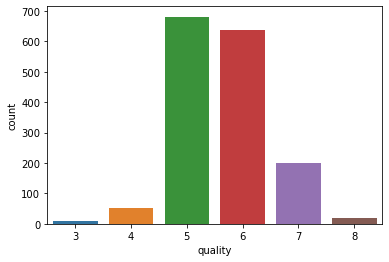

In [16]:
sns.countplot(wine_data["quality"])

There are very big difference between classes. There is imbalance issue exist.

<AxesSubplot:ylabel='quality'>

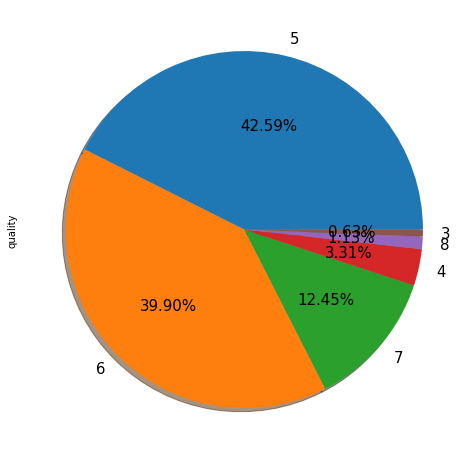

In [17]:
wine_data["quality"].value_counts().plot.pie(figsize = (8,10), autopct = "%1.2f%%", fontsize = 15, shadow=True)

There are very big difference between classes. There is imbalance issue exist. Let's fix it

## Oversampling

In [18]:
x = wine_data.drop("quality",axis=1)
y = wine_data["quality"]

In [19]:
from imblearn.over_sampling import SMOTE

SM = SMOTE()

x,y = SM.fit_resample(x,y)

y.value_counts()

7    681
5    681
3    681
8    681
6    681
4    681
Name: quality, dtype: int64

Now the imbalance issue has been resolved and the wine_data looks good. Let's continue

## Visualize the Correlation

In [20]:
# Analyzing the correlation feature vs label

x.corrwith(y)

fixed acidity           0.117257
volatile acidity       -0.675243
citric acid             0.358253
residual sugar          0.036465
chlorides              -0.387613
free sulfur dioxide     0.125399
total sulfur dioxide    0.077853
density                -0.341898
pH                     -0.303376
sulphates               0.578722
alcohol                 0.594689
dtype: float64

<AxesSubplot:title={'center':'Correlation With Quality'}>

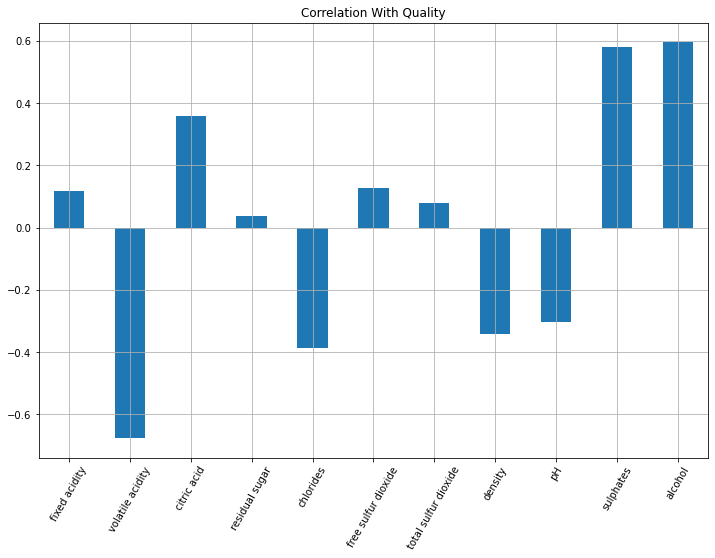

In [21]:
# Analyzing by ploting the graph

x.corrwith(y).plot(kind='bar',grid=True,figsize=(12,8),rot=60,title="Correlation With Quality")

It seems that 'volatile acidity', 'sulphates' & 'alcohol' is very highly related to the label. And 'residual sugar' is very low relation with label

## Visualizing the Correlation between features (Multicollinearity Checking)

In [22]:
corr = wine_data.corr()
corr.shape

(12, 12)

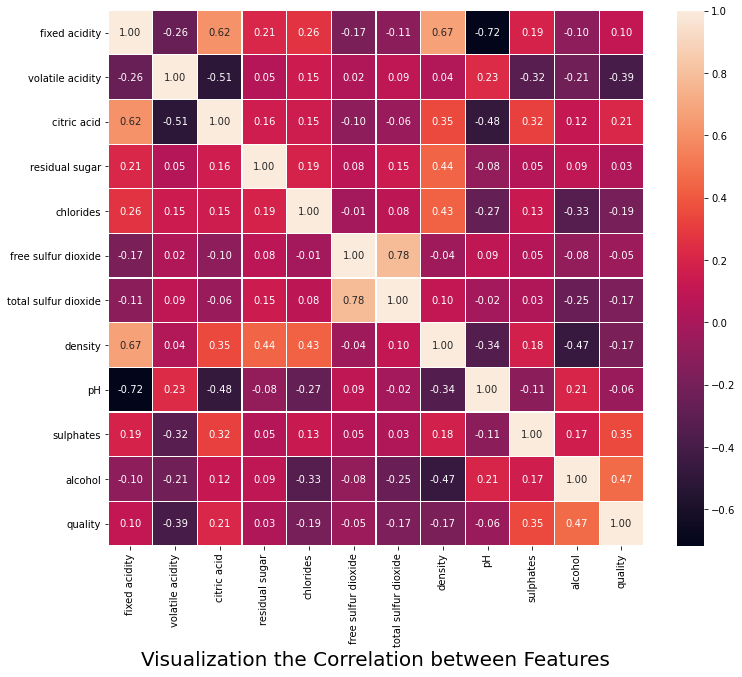

In [23]:
# Analyzing by ploting a heatmap

plt.figure(figsize = (12,12))
sns.heatmap(corr, cbar=True, square=True, cbar_kws={"shrink":.82}, fmt='.2f', annot=True, annot_kws={"size":10},linewidth=.2)
plt.xlabel("Visualization the Correlation between Features", fontsize=20)
plt.show()

There is no any feature related to another feature. Which means no multicollinearity found between features

#### Now the preprocessing part is completed, Now I am going to build my Classification models 




# Model Building Start -->>

Importing Necessary Libraries



In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve, accuracy_score, classification_report

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [25]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

## Let's find best random state

In [26]:
# Finding best random state using Random Forest Classifier

aucMAX = 0
stateMAX = 0

for i in range(1,200):
    x_scaled_train, x_scaled_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = i)
    testing = RandomForestClassifier()
    testing.fit(x_scaled_train, y_train)
    y_pred = testing.predict(x_scaled_test)
    test_score = accuracy_score(y_test, y_pred)
    if test_score > aucMAX:
        aucMAX = test_score
        stateMAX = i

print("Best Random State is : ",stateMAX)

Best Random State is :  177


## Let's find ROC AUC score

In [27]:
x_scaled_train, x_scaled_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = stateMAX)

In [28]:
# Decision Tree Classifier    
    
DTC = DecisionTreeClassifier()
DTC.fit(x_scaled_train, y_train)
y_pred = DTC.predict_proba(x_scaled_test)
dtc = roc_auc_score(y_test, y_pred, multi_class = 'ovr', average = 'weighted')

In [29]:
# Gradient Boosting Classifier

GBC = GradientBoostingClassifier()
GBC.fit(x_scaled_train, y_train)
y_pred = GBC.predict_proba(x_scaled_test)
gbc = roc_auc_score(y_test, y_pred, multi_class = 'ovr', average = 'weighted')

In [30]:
# Random Forest Classifier    
    
RFC = RandomForestClassifier()
RFC.fit(x_scaled_train, y_train)
y_pred = RFC.predict_proba(x_scaled_test)
rfc = roc_auc_score(y_test, y_pred, multi_class = 'ovr', average = 'weighted')

In [31]:
# K-Neibhours Classifier

KNC = KNeighborsClassifier()
KNC.fit(x_scaled_train, y_train)
y_pred = KNC.predict_proba(x_scaled_test)
knc = roc_auc_score(y_test, y_pred, multi_class = 'ovr', average = 'weighted')

In [33]:
print("Random Forest Classifier roc_auc_score is : ",rfc)
print("Decision Tree Classifier roc_auc_score is : ",dtc)
print("Gradient Boosting Classifier roc_auc_score is : ",gbc)
print("K-Neighbors Classifier Best roc_auc_score is : ",knc)

Random Forest Classifier roc_auc_score is :  0.9873280056185403
Decision Tree Classifier roc_auc_score is :  0.8839320376955971
Gradient Boosting Classifier roc_auc_score is :  0.9721657016918285
K-Neighbors Classifier Best roc_auc_score is :  0.9478199491601416


In [34]:
# Cross Validation Scores...

rcvs = cross_val_score(RFC,x_scaled,y,cv=5,scoring='roc_auc_ovr_weighted').mean()
dcvs = cross_val_score(DTC,x_scaled,y,cv=5, scoring = 'roc_auc_ovr_weighted').mean()
gcvs = cross_val_score(GBC,x_scaled,y,cv=5,scoring = 'roc_auc_ovr_weighted').mean()
kcvs = cross_val_score(KNC,x_scaled,y,cv=5, scoring = 'roc_auc_ovr_weighted').mean()

print("Cross Validation Score of Random Forest Classifier is : ",rcvs)
print("Cross Validation Score of Decision Tree Classifier is : ",dcvs)
print("Cross Validation Score of Gradient Boosting Classifier is : ",gcvs)
print("Cross Validation Score of K-Neighbors Classifier is : ",kcvs)

Cross Validation Score of Random Forest Classifier is :  0.9683998001248091
Cross Validation Score of Decision Tree Classifier is :  0.8537467845665274
Cross Validation Score of Gradient Boosting Classifier is :  0.9487407869314082
Cross Validation Score of K-Neighbors Classifier is :  0.921350275470892


## The difference between roc_auc_score & cross valudation score

In [35]:
# Average Score after cross validation technique


print("Random Forest Classifier Difference after Cross Validation : ",(rfc - rcvs))
print("Decision Tree Classifier Difference after Cross Validation : ",(dtc - dcvs))
print("Gradient Boosting Classifier Difference after Cross Validation : ",(gbc - gcvs))
print("K-Neighbors Classifier Difference after Cross Validation : ",(knc - kcvs))

Random Forest Classifier Difference after Cross Validation :  0.0189282054937312
Decision Tree Classifier Difference after Cross Validation :  0.030185253129069722
Gradient Boosting Classifier Difference after Cross Validation :  0.0234249147604203
K-Neighbors Classifier Difference after Cross Validation :  0.026469673689249573


After applying the cross_val_score, the difference between accuracy_score and cross_val_score are given above. And you can find that the Random Forest Classifier has minimum difference between them than others models. So, I choose the Random Forest Classifier as the best model for this dataset.

## Hyper Parameter Tuning with Random Forest Classifier

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
param_grid = {"n_estimators" : [13,15],
              "criterion" : ["gini", "entropy"],
             "max_depth" : [40,45],
              "min_samples_split" : [7,9],
             "min_samples_leaf" : [3,5]}

In [39]:
gridsearch = GridSearchCV(RFC, param_grid=param_grid)

In [40]:
gridsearch.fit(x_scaled_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [40, 45], 'min_samples_leaf': [3, 5],
                         'min_samples_split': [7, 9],
                         'n_estimators': [13, 15]})

In [41]:
gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 45,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 15}

## Final Model

In [57]:
Final_Model = RandomForestClassifier(criterion = 'gini', max_depth=45, min_samples_leaf = 3, min_samples_split=7, n_estimators=100)
Final_Model.fit(x_scaled_train, y_train)
y_pred = Final_Model.predict_proba(x_scaled_test)
final_score = roc_auc_score(y_test,y_pred,multi_class = 'ovr',average = 'weighted')
final_score

0.9833518611151768

## Let's plot ROC AUC curve for our Final Model

In [58]:
import scikitplot as skplt

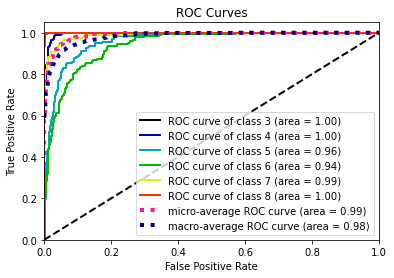

In [59]:
skplt.metrics.plot_roc_curve(y_test, Final_Model.predict_proba(x_scaled_test))
plt.show()

## Saving The Model

In [60]:
import joblib

joblib.dump(Final_Model, "Final Model.pkl")

['Final Model.pkl']

## Loading The Model

In [61]:
Load = joblib.load("Final Model.pkl")
Load.predict(x_scaled)

array([5, 5, 5, ..., 8, 8, 8], dtype=int64)